# Riss 인기 학술자료 텍스트 마이닝

## 1. 사용할 패키지 설치

https://www.oracle.com/java/technologies/downloads/#jdk19-mac   
Java JDK 다운로드.   
konlpy를 사용하기 위해 필요.

에러 발생시 (M1)  
https://www.azul.com  
https://velog.io/@wijoonwu/맥북Mac-OS-M1-JDK-설치하기

In [2]:
!pip3 install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 38.8 MB/s eta 0:00:00a 0:00:01
  Using cached trio_websocket-0.10.2-py3-none-any.whl (17 kB)
  Using cached trio-0.22.0-py3-none-any.whl (384 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.0/157.0 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.2/123.2 kB 17.0 MB/s eta 0:00:00
  Using cached async_generator-1.10-py3-none-any.whl (18 kB)
  Using cached outcome-1.2.0-py2.py3-none-any.whl (9.7 kB)
  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl (29 kB)
  Using cached exceptiongroup-1.1.1-py3-none-any.whl (14 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 7.4 MB/s eta 0:00:00
  Using cached idna-3.4-py3-none-any.whl (61 kB)
  Using cached sniffio-1.3.0-py3-none-any.whl (10 kB)
  Using cached wsproto-1.2.0-py3-none-any.whl (24 kB)
  Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)
  Using cached h11-0.14.0-py3-none-any.whl (58 kB)

[notice] A new release of pip is available: 

In [3]:
!pip3 install jpype1

  Using cached JPype1-1.4.1-cp310-cp310-macosx_10_9_universal2.whl (590 kB)

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [6]:
!pip3 install konlpy

  Using cached konlpy-0.6.0-py2.py3-none-any.whl (19.4 MB)
  Using cached lxml-4.9.2.tar.gz (3.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for lxml: filename=lxml-4.9.2-cp310-cp310-macosx_10_9_universal2.whl size=3150017 sha256=ca71e7e035e5670509e32591306aa562707746c35563c48f657b7cdae7fa94ad
  Stored in directory: /Users/uuu9/Library/Caches/pip/wheels/5a/51/0e/95b4a6ddee4a616530c36aeb03dafb5e04183756d9973a7d5d
Successfully built lxml


## 2. 사용할 패키지 호출

In [23]:
from selenium import webdriver
from selenium.webdriver.common.by import By

## 3. 프로그래밍

In [24]:
# webdriver 실행 후 riss 이동
browser = webdriver.Chrome()
browser.get("http://www.riss.kr/PopularList.do") 

In [25]:
# 현제 제공되고 있는 인기 학술자료 목록이 사용된 기간을 저장한다.
span1 = browser.find_element(By.CLASS_NAME, 'periodSpan1').text
span2 = browser.find_element(By.CLASS_NAME, 'periodSpan2').text
data_date = (span1 + "~" +span2)
data_date

'2023.7.9~2023.8.5'

In [26]:
# 페이지의 자료 확장
browser.find_element(By.ID, 'nextList').click()

In [27]:
thesis_data = browser.find_elements(By.TAG_NAME, 'tr')

csv = open(f"csv/{data_date}.csv", "a")
csv.write("논문 제목, 링크\n")
csv.close()

for thesis_data_sort in thesis_data:
    thesis_titles = thesis_data_sort.find_elements(By.CLASS_NAME, 'title')
    
    for thesis_title_data in thesis_titles:
        title = thesis_title_data.text
        link = thesis_title_data.get_attribute("href")
        
        csv = open(f"csv/{data_date}.csv", "a")
        csv.write(f"{title}, {link}\n")
        csv.close()
        
        file = open(f"txt/{data_date}.txt", "a")
        file.write(f"{title}\n")
        file.close()

In [28]:
# 저장한 텍스트 파일 읽어오기
file_data = open(f"txt/{data_date}.txt", encoding= "UTF-8").read()
file_data

"미래 사회에서 메타버스 교육의 방향\n사형제도는 폐지되어야 하는가?\n스트레스 수준이 대학생들의 학업 성취도에 미치는 영향\n촉법소년 상한(형사미성년자) 연령 하향에 대한 비판적 고찰\n챗GPT에 빼앗긴 밥그릇\nChatGPT시대 인공지능교육정책의 문제점 고찰\nMZ 세대의 개인주의 문화, 어떻게 볼 것인가?\n노키즈존 확산, 어떻게 볼 것인가?\n국내외 가짜뉴스(Fake News)에 대한 뉴스 공정성 연구논의 탐색\n일본의 후쿠시마 오염수 해양 방출 계획 저지를 위한 한국의 대응 전략: 방사성물질로부터 영해 수호를 위한 정책적 제언\n바이오 기술을 통한 의약품 산업의 혁신\n다이어트, 당신은 건강합니까?\n[토론문 1] 저출산·고령화와 인구정책\n미혼 성인남녀의 저출산 정책 인식에 관한 연구\n자연 상태에서 일어나는 음펨바 효과에 대한 연구\n그리스-로마 신화의 교훈\n최근 5년간 한국 의학드라마에 나타난 간호사 이미지와 역할 수행에 대한 연구\n영화 속에서 나타난 인공지능의 인간화와 인간지배 현상 연구 - 신체가 있는 인공지능과 하이퍼 인공지능을 중심으로\n사상체질과 MBTI성격유형검사를 통한 대학생 건강염려증의 상관관계연구\n고교학점제의 쟁점과 과제 분석\n챗GPT 충격파… 성큼 다가온 인공지능\n촉법소년 상한연령 하향 인식에의 영향요인 - 소년사법 실무전문가들을 중심으로 -\n인공지능교육에 대한 초등교사의 인식 조사\n대리모 산업의 윤리적 문제와 해결방안\n최저임금제도 개선방안에 관한 연구\n음악치료 소개와 음악이란 매개체가 갖는 특별한 우수성\n배양육이 축산을 대체할 수 있을까?\n중학생의 신조어 사용 인식 실태 및 현황\n바이럴마케팅의 방향에 관한 연구와 진행 사례\n펜타닐에 대한 중독경험자와 전문가의 인식 차이\n한국 인공지능 교육의 방향\n챗봇 기반 인공지능 교육 프로그램 개발과 적용\n종자산업과 유전자가위기술의 안전성에 관한 제언\n미국의 청소년 마약류 사용 대응 정책 고찰을 통한 국내 정책의 시사점\n성별에 따른 인슐린 저항성과 대사증후군과

In [29]:
# 불필요한 문자 제거
# '[^가-힣]' : 한글이 아닌 모든 문자
import re
file_data = re.sub('[^가-힣]', ' ', file_data)
file_data

'미래 사회에서 메타버스 교육의 방향 사형제도는 폐지되어야 하는가  스트레스 수준이 대학생들의 학업 성취도에 미치는 영향 촉법소년 상한 형사미성년자  연령 하향에 대한 비판적 고찰 챗   에 빼앗긴 밥그릇        시대 인공지능교육정책의 문제점 고찰    세대의 개인주의 문화  어떻게 볼 것인가  노키즈존 확산  어떻게 볼 것인가  국내외 가짜뉴스           에 대한 뉴스 공정성 연구논의 탐색 일본의 후쿠시마 오염수 해양 방출 계획 저지를 위한 한국의 대응 전략  방사성물질로부터 영해 수호를 위한 정책적 제언 바이오 기술을 통한 의약품 산업의 혁신 다이어트  당신은 건강합니까   토론문    저출산 고령화와 인구정책 미혼 성인남녀의 저출산 정책 인식에 관한 연구 자연 상태에서 일어나는 음펨바 효과에 대한 연구 그리스 로마 신화의 교훈 최근  년간 한국 의학드라마에 나타난 간호사 이미지와 역할 수행에 대한 연구 영화 속에서 나타난 인공지능의 인간화와 인간지배 현상 연구   신체가 있는 인공지능과 하이퍼 인공지능을 중심으로 사상체질과     성격유형검사를 통한 대학생 건강염려증의 상관관계연구 고교학점제의 쟁점과 과제 분석 챗    충격파  성큼 다가온 인공지능 촉법소년 상한연령 하향 인식에의 영향요인   소년사법 실무전문가들을 중심으로   인공지능교육에 대한 초등교사의 인식 조사 대리모 산업의 윤리적 문제와 해결방안 최저임금제도 개선방안에 관한 연구 음악치료 소개와 음악이란 매개체가 갖는 특별한 우수성 배양육이 축산을 대체할 수 있을까  중학생의 신조어 사용 인식 실태 및 현황 바이럴마케팅의 방향에 관한 연구와 진행 사례 펜타닐에 대한 중독경험자와 전문가의 인식 차이 한국 인공지능 교육의 방향 챗봇 기반 인공지능 교육 프로그램 개발과 적용 종자산업과 유전자가위기술의 안전성에 관한 제언 미국의 청소년 마약류 사용 대응 정책 고찰을 통한 국내 정책의 시사점 성별에 따른 인슐린 저항성과 대사증후군과의 관련성 인공지능을 활용한 예술융합교육이 초등학생 창의성에 

#### m1 맥에서 jvm을 제대로 찾지 못하는 이슈가 있었음.
#### 맨 위의 링크를 통해 설치하고 경로를 직접 설정
#### https://github.com/konlpy/konlpy/issues/353 해당 페이지 참조

In [30]:
# 명사 추출
import konlpy
JVM_PATH = '/Library/Java/JavaVirtualMachines/zulu-11.jdk/Contents/Home/bin/java'


hannanum = konlpy.tag.Hannanum(jvmpath=JVM_PATH)
nouns_data = hannanum.nouns(file_data)
print(nouns_data)


['미래', '사회', '메타버스', '교육', '방향', '사형제도', '폐', '스트레스', '수준', '대학생들', '학업', '성취도', '영향', '촉법소년', '형사미성년자', '연령', '하향', '비판적', '고찰', '챗', '밥그릇', '시대', '인공지능교육정책', '문제점', '고찰', '세대', '개인주의', '문화', '것', '노키즈존', '확산', '것', '국내외', '가짜뉴스', '뉴스', '공정성', '연구논', '탐색', '일본', '후쿠시마', '오염수', '해양', '방출', '계획', '한국의', '대응', '전략', '방사성물질', '수호', '정책적', '제언', '바', '기술', '의약품', '산업', '혁신', '다이어트', '당신', '건강', '토론문', '저출산', '고령화', '인구정책', '미혼', '성인남녀', '저출산', '정책', '식', '연구', '자연', '상태', '음펨바', '효과', '연구', '그리스', '로마', '신화', '교훈', '년', '한국', '의학드라마', '간호사', '이미지', '수행', '연구', '영화', '속', '인공지능', '인간화', '인간지배', '현상', '연구', '신체', '인공지능', '하이퍼', '인공지능', '중심', '사상체질', '성격유형검사', '대학생', '건강염려증', '상관관계연구', '고교학점제', '쟁점', '과제', '분석', '챗', '충격파', '인공지능', '촉법소년', '상한연령', '하향', '식', '영향요', '소년사법', '실무전문가들', '중심', '인공지능교육', '초등교사', '인식', '조사', '대리모', '산업', '윤리적', '문제', '해결방안', '최저임금제', '개선방안', '연구', '음악치료', '소개', '음악', '매개체', '특별', '우수성', '배양육', '축산', '대체', '수', '중학생', '신조', '사용', '인식', '실태', '현황', '바이럴마케팅', '방향', '연구

In [31]:
import pandas as pd
df_word = pd.DataFrame({'word' : nouns_data})
df_word

,word
0,미래
1,사회
2,메타버스
3,교육
4,방향
...,...
575,위장제품
576,그린워싱
577,의
578,현황


In [32]:
df_word['count'] = df_word['word'].str.len()
df_word

,word,count
0,미래,2
1,사회,2
2,메타버스,4
3,교육,2
4,방향,2
...,...,...
575,위장제품,4
576,그린워싱,4
577,의,1
578,현황,2


In [33]:
df_word = df_word.groupby('word', as_index=False)\
    .agg(n = ('word', 'count'))\
        .sort_values('n', ascending=False)
df_word

,word,n
271,인공지능,21
221,연구,19
146,분석,8
226,영향,8
47,교육,7
...,...,...
54,구현,1
180,성취도,1
179,성인남녀,1
178,성별,1


In [34]:
# 단어 빈도 막대 그래프
top20 = df_word.head(20)

In [35]:
!pip3 install seaborn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


<Axes: xlabel='n', ylabel='word'>

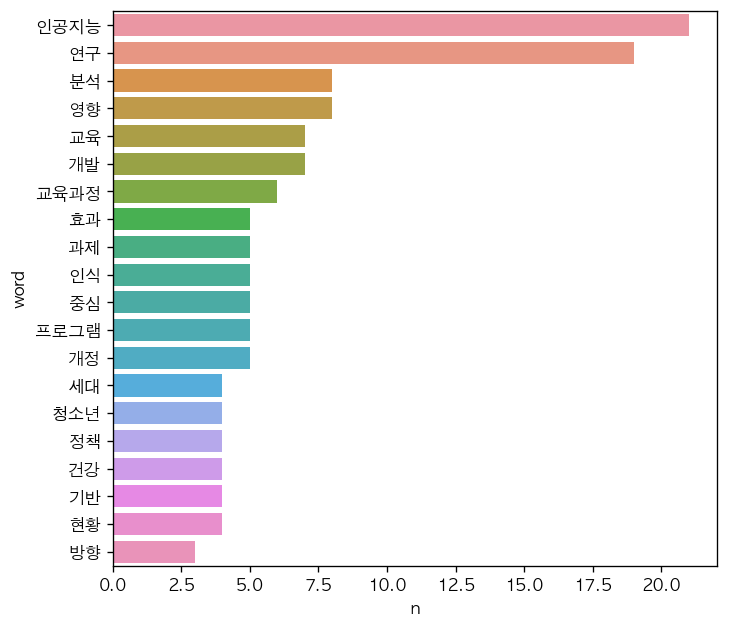

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# 폰트의 경우 
# https://github.com/GUuu9/Nas_Docker_jupyter_Ko_fonts
# 해당 페이지을 참고하여 폰트 설정

plt.rcParams.update({'font.family' : 'AppleGothic',
                    'figure.dpi' : '120',
                    'figure.figsize' : [6.5, 6]})

bar_data = sns.barplot(data = top20, y = 'word', x= 'n')
plt.savefig(f'barplot/{data_date}.png', dpi=300)
bar_data

In [37]:
# 워드 클라우드 생성
!pip3 install wordcloud


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [38]:
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

{'인공지능': 21,
 '연구': 19,
 '분석': 8,
 '영향': 8,
 '교육': 7,
 '개발': 7,
 '교육과정': 6,
 '효과': 5,
 '과제': 5,
 '인식': 5,
 '중심': 5,
 '프로그램': 5,
 '개정': 5,
 '세대': 4,
 '청소년': 4,
 '정책': 4,
 '건강': 4,
 '기반': 4,
 '현황': 4,
 '방향': 3,
 '예술': 3,
 '관련': 3,
 '관계': 3,
 '대응': 3,
 '음악': 3,
 '비교': 3,
 '고찰': 3,
 '이용': 3,
 '리더십': 3,
 '기술': 3,
 '국어': 3,
 '창의성': 3,
 '마약': 2,
 '문해력': 2,
 '비판적': 2,
 '식': 2,
 '시사점': 2,
 '방안': 2,
 '미래': 2,
 '사용': 2,
 '변화': 2,
 '수학적': 2,
 '수': 2,
 '사회': 2,
 '산업': 2,
 '스마트시티': 2,
 '시대': 2,
 '역량': 2,
 '영역': 2,
 '활용': 2,
 '활성화': 2,
 '한국': 2,
 '학습': 2,
 '학생': 2,
 '하향': 2,
 '필요': 2,
 '촉법소년': 2,
 '초등학생': 2,
 '초': 2,
 '챗': 2,
 '제언': 2,
 '전망': 2,
 '적용': 2,
 '저출산': 2,
 '쟁점': 2,
 '이론': 2,
 '의': 2,
 '우리': 2,
 '오염수': 2,
 '오가노이드': 2,
 '윤리적': 2,
 '후쿠시마': 2,
 '고교학점제': 2,
 '국내외': 2,
 '국내': 2,
 '것': 2,
 '자동창작시대': 1,
 '고등학생들': 1,
 '장애': 1,
 '작품': 1,
 '작동': 1,
 '자율주행자동차': 1,
 '자연': 1,
 '자동화': 1,
 '노키즈존': 1,
 '저감': 1,
 '자기표현': 1,
 '입장': 1,
 '임파워먼트': 1,
 '일본신화': 1,
 '일본': 1,
 '인체': 1,
 '인지발달': 1,
 '자기효능감': 1,
 '저항

In [39]:
from wordcloud import WordCloud
we = WordCloud(random_state = 1234,
              font_path = 'AppleGothic',
              width = 400,
              height = 400,
              background_color = 'white')

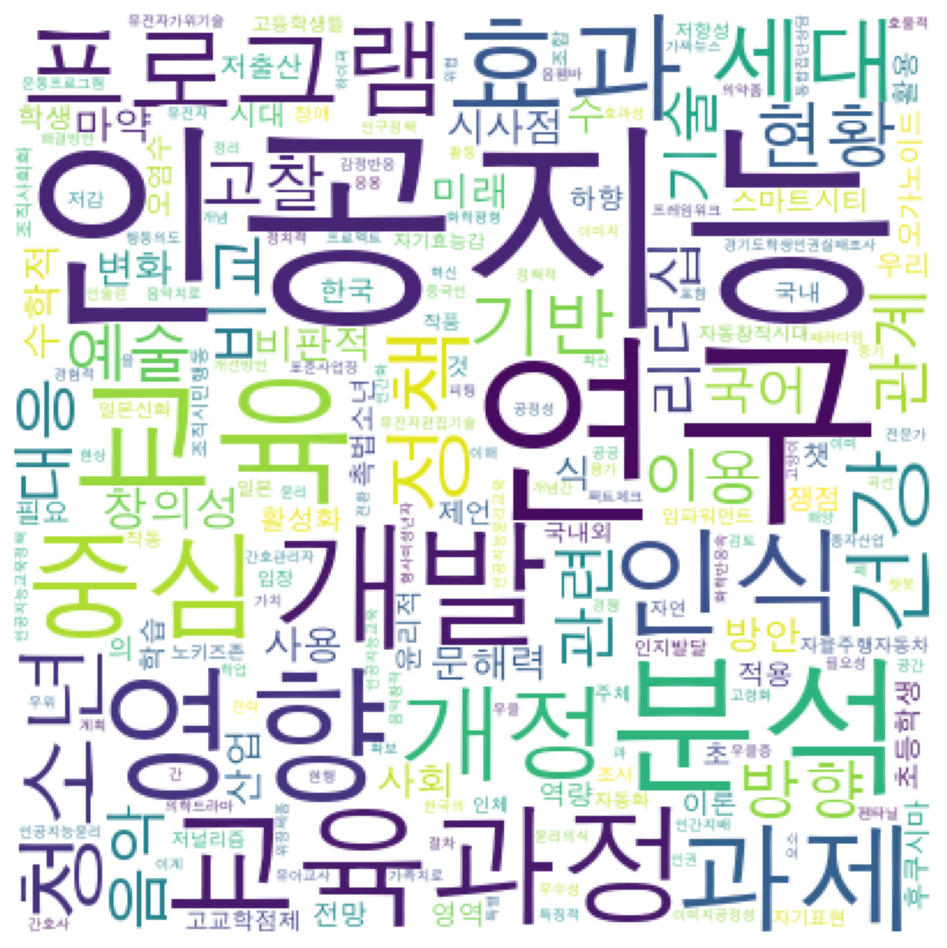

In [40]:
img_wordcloud = we.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10))
plt.axis('off')
img_wordcloud = plt.imshow(img_wordcloud)
plt.savefig(f'wordcloud/{data_date}.png', dpi=300)
img_wordcloud

➜Riss_Popular_thesis_wordCloud git:(main) ✗ git init  

➜  Riss_Popular_thesis_wordCloud git:(main) ✗ git add .  

➜  Riss_Popular_thesis_wordCloud git:(main) ✗ git commit -m "init commit"  

➜  Riss_Popular_thesis_wordCloud git:(main) git branch -M main  

➜  Riss_Popular_thesis_wordCloud git:(main) git push origin main  


에러 발생시
git push -f origin 명령으로 강제 업로드